# __D209 PA Task 2:__ *Prediction Analysis using Decision Trees*
>### Aaminah Halipoto
>### Western Governor's University
>### D209: Data Mining I
>### Prof. Festus Elleh
>### Oct 1. 2024

### Table of Contents
>A1. [Proposal of Question](#question) </br>
A2. [Defined Goal](#goal)</br>
B1. [Explanation of Classification Method](#prediction)</br>
B2. [Summary of Method Assumption](#summary)</br>
B3. [Packages and Libraries](#packages)</br>
C1. [Data preprocessing](#preprocessing)</br>
C2. [Dataset variables](#dataset)</br>
C3. [Steps for analysis](#steps)</br>
C4. [Cleaned dataset](#cleaned)</br>
D1. [Splitting data](#splitting)</br>
D2. [Output and intermediate calculations](#output)</br>
D3. [Code execution](#code)</br> 
E1. [Accuracy and MSE](#accuracy)</br>
E2. [Results and implications](#results)</br>
E3. [Limitations](#limitations)</br>
E4. [Course of action](#course)</br>
F. [Panopto Demonstration](#panoptolink)</br>
G. [Sources of Third-Party Code](#codesources)</br>
H. [Web Sources](#sources)</br>

#### __A1. Proposal of Question__ <a name="toolsbenefits"></a>
<i>Can a decision tree regressor be used to determine whether high technological familiarity and shorter customer contracts predicts a customer's bandwidth usage? 

#### __A2. Defined Goal__ <a name="goal"></a>
My goal is to create a decision tree regressor that accurately predicts a customer's bandwidth usage based on variables within the dataset. This model should be able to be used to give actionable insights to the service provider that leads to increased profits and higher service usage amongst their customer base.

#### __B1. Explanation of Prediction__ <a name="prediction"></a>
Decision trees are models, consisting of nodes and leaves, that categorize features (or explanatory variables) based on their labels (values within each variable). I'm using a regression tree as I am targeting a continuous quantitative response variable for predictions, as opposed to a classifier tree used for categorical predictor variables. 

The tree begins with the root question -- 'What is the customer's bandwidth?' -- and continuously splits data along decision nodes by asking questions to eventually provide a leaf, or prediction, for the response variable. Decision nodes may fork at boundaries within feature labels such as ‘Age > 30’ or ‘Contract = One year’, creating branches that successively culminate in a leaf. The depth of the model indicates how many levels the tree will split from the root; a depth of 3 suggests a maximum of 2 decision nodes before budding into a prediction. 

I plan to split the data amongst 70% training material and 30% subsequent testing material with a depth of 4 levels, ensuring that the decision tree has sufficient data and decision nodes to learn from. I expect that testing the data against the tree’s predictions will show that the tree can accurately predict continuous values of bandwidth usage for customers. 


#### __B2. Summary of Method Assumption__ <a name="summary"></a>
I am building a regressor tree with the assumption that the root node takes into account all training data. Because the root node is so foundational, it needs to run on all present data in order to split into decision nodes, the fork at which a decision is made in the decision path. This assumption bolsters the need for a thorough data cleaning process.

#### __B3. Packages and Libraries__ <a name="packages"></a>
I am using Python v. 3.12 in the JupyterLabs IDE, with several useful analytical libraries. Firstly, Pandas is used for its myriad capabilities in manipulating dataframes. Seaborn and matplotlib both render detailed visualizations such as the histogram and boxplot, essential to my process in identifying outliers. Scikit-learn contains the breadth of functions for data-mining: the decision tree regressor, train_test_split to split mining data, as well as evaluation tools such as classification_report, the accuracy score, and mean squared error. The Statsmodels package contains the useful APIs for creating regression models and providing summary info on model structures, seen in the mosaic function.

#### __C1. Data preprocessing__ <a name="preprocessing"></a>
One of my goals is to ensure that the dataset is free of duplicates, as they misrepresent the reality of the dataset. Decision trees can handle outliers and null values both, so I pay extra attention ot make sure duplicate records aren’t present to affect the model. 

#### __C2. Dataset variables__ <a name="dataset"></a>
Narrowed down via linear regression modelling,  the variables to be used in the decision tree regression are as follows:
>Bandwidth_GB_Year, a numeric variable and the target of analysis;

>Tenure, a numeric variable;

>Contract, a categorical variable;

>Age, a numeric variable;

>Tenure, a numeric variable;

>Children, a numeric variable;

>Churn, a categorical variable; and

>Techie, a categorical variable.

#### __C3. Steps for analysis__ <a name="steps"></a>
In order to make my efforts successful, all duplicates, nulls, and outliers need to be cleaned in the dataset. Additionally, any categorical variables will be one-hot encoded to numerical values. Decision trees do not require data to be normalized before data mining, so the resulting dataframe from this process should suffice as training data.

In [11]:
#import necessary functions
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

#setting "clean" data as a dataframe
df = pd.read_csv('C://Users/Aaminah/Desktop/masters/D208/churn_clean.csv')

#allowing our dictionaries to cast between datatypes
pd.set_option('future.no_silent_downcasting', True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [13]:
df.fillna({'InternetService': "None"}, inplace = True)

In [14]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [15]:
#initing tentative dataset to be cleaned and encoded
initdata = df[['Bandwidth_GB_Year', 'Tenure', 'Contract', 'Age', 'Children', 
               'Churn','Techie']]

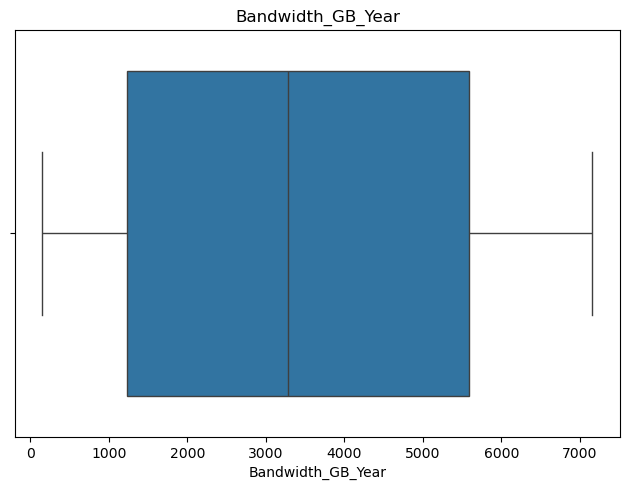

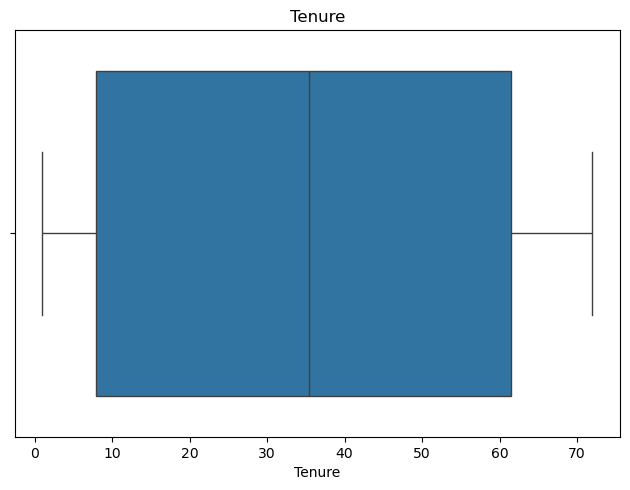

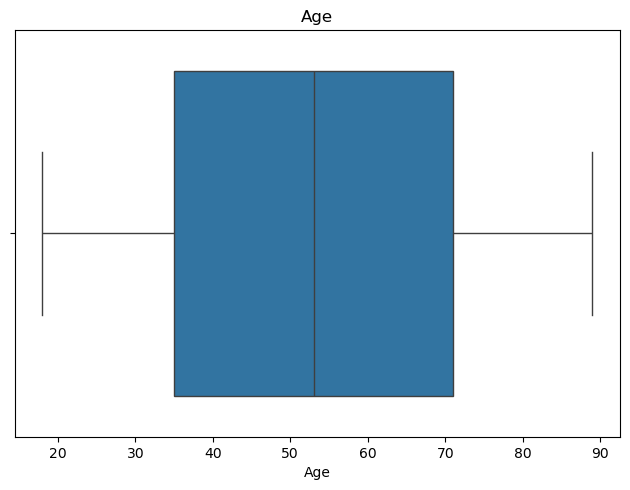

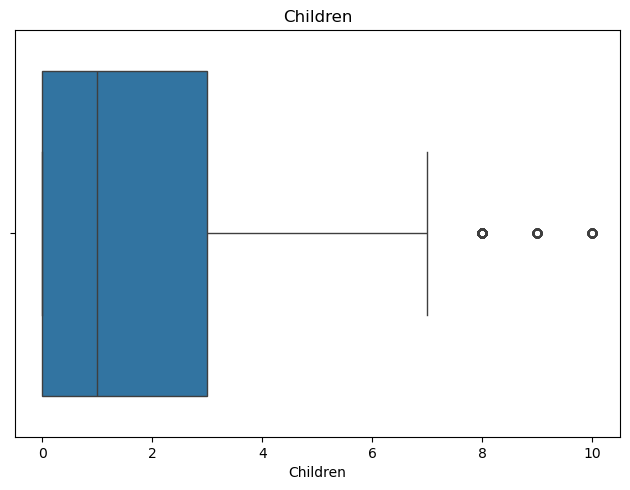

In [16]:
#all outliers seem to be in order, move on
for col in initdata: 
    if pd.api.types.is_numeric_dtype(initdata[col]):
        boxplot = sb.boxplot(x=initdata[col], data=initdata)
        plt.tight_layout()
        plt.title(col)
        plt.show()
    else: continue

In [17]:
#encoding churn to a single column, numerically
df['Churn_numeric'] = df['Churn']
dict_churn = {"Churn_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_churn)
df["Churn_numeric"]= df["Churn_numeric"].astype(int)

In [18]:
contract_encoded = pd.get_dummies(df['Contract'], dtype = int)
contract_encoded.head()

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [19]:
#transferring dummy variables into dataframe
df['Contract_monthly'] = contract_encoded['Month-to-month']
df['Contract_one'] = contract_encoded['One year']
df['Contract_two'] = contract_encoded['Two Year']
print(df['Contract_two'])
df['Contract_one'].value_counts()

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: Contract_two, Length: 10000, dtype: int32


Contract_one
0    7898
1    2102
Name: count, dtype: int64

In [20]:
df['Techie_numeric'] = df['Techie']
dict_techie = {"Techie_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_techie)
df["Techie_numeric"]= df["Techie_numeric"].astype(int)

#### __C4. Cleaned dataset__ <a name="cleaned"></a>

In [22]:
#dropping dummy variable from Contract to form testdata dataframe
testdata = df[['Bandwidth_GB_Year', 'Tenure', 'Contract_monthly', 'Age', 'Children', 
               'Churn_numeric','Techie_numeric']]
testdata.head()

,Bandwidth_GB_Year,Tenure,Contract_monthly,Age,Children,Churn_numeric,Techie_numeric
0,904.536110,6.795513,0,68,0,0,0
1,800.982766,1.156681,1,27,1,1,1
2,2054.706961,15.754144,0,50,4,0,1
3,2164.579412,17.087227,0,48,1,0,1
4,271.493436,1.670972,1,83,0,1,0


In [23]:
#testdata.to_csv('C://Users/Aaminah/Desktop/masters/D209/testdata_pt2.csv', index=False)

#### __D1. Splitting data__ <a name="splitting"></a>
Below details the process of splitting the data 70/30 into training/testing data, respectively. The model's y is initialized as the response variable 'Bandwidth_GB_Year', and the X as the remaining predictor variables.

In [25]:
y = testdata[['Bandwidth_GB_Year']].values
X = testdata.drop('Bandwidth_GB_Year', axis=1).values
print(X.shape, y.shape)

(10000, 6) (10000, 1)


In [26]:
# Split dataset into 70% train, 30% test
X_train, X_test, y_train, y_test= tts(X, y,
                                      test_size=0.3,
                                      random_state=3)
# Instantiate dt
#(Datacamp, 2024)
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [27]:
# Fit dt to the training set
dt.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt.predict(X_test)

In [28]:
#exporting all sets as .csv
df_X_train = pd.DataFrame(X_train) 
df_X_train.to_csv('C://Users/Aaminah/Desktop/masters/D209/X_train_pt2.csv', index=False, header= ['Tenure','Contract_monthly','Age','Children','Churn_numeric','Techie_numeric'])

In [29]:
df_X_test = pd.DataFrame(X_test) 
df_X_test.to_csv('C://Users/Aaminah/Desktop/masters/D209/X_test_pt2.csv', index=False, header=['Tenure','Contract_monthly','Age','Children','Churn_numeric','Techie_numeric'])

In [30]:
df_y_train = pd.DataFrame(y_train) 
df_y_train.to_csv('C://Users/Aaminah/Desktop/masters/D209/y_train_pt2.csv', index=False, header=['Bandwidth_GB_Year'])

In [31]:
df_y_test = pd.DataFrame(y_test) 
df_y_test.to_csv('C://Users/Aaminah/Desktop/masters/D209/y_test_pt2.csv', index=False, header=['Bandwidth_GB_Year'])

#### __D2. Output and intermediate calculations__ <a name="output"></a>
Regression tree modelling necessitates sectioning the X and y datasets, with a larger proportion going into training sets, and a smaller proportion used for testing. This is to ensure that the model has enough data to learn from, but not so much that we are unable to assess its accuracy against the dataset. I create a regression tree with a depth (maximum number of branches before predictions are made) of 4, and fit both training sets to the tree. This enables the tree to create predictions based on the data it just learned from, which I stored in y_pred. To test the accuracy of the model and ensure it is usable, I compare the prediction data to the y_test data and see how it differs.  

Calculations for splitting the data and calculating error reports are provided in the above and below sections. 

The process for finding the relevant variables for regression analysis was conducted via multilinear regression modelling. Dummy variables are dropped to prevent multicollinearity. Below is the model exhibiting these few variables, where the feature p-values less than 0.05 indicate correlation to the response variable.

In [33]:
model = sm.OLS(y, testdata.drop('Bandwidth_GB_Year', axis=1).assign(const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.299e+05
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:24:46   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9993   BIC:                         1.385e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tenure              84.3378      0.108  

#### __D3. Code execution__ <a name="code"></a>
All procedures and code are provided in the file 'regressiontree-ahalipoto.ipynb'.

In [35]:
print(f' The mean accuracy is {dt.score(X_test, y_test)}')

 The mean accuracy is 0.9688089672385882


In [36]:
#(Datacamp, 2024)
mse = MSE(y_test, y_pred)
print(f'The mean squared error is {mse:2f}')

The mean squared error is 149041.874735


In [37]:
print(f'The root mean squared error is {np.sqrt(mse):2f}')

The root mean squared error is 386.059419


#### __E1. Accuracy and MSE__ <a name="accuracy"></a>
Regression tree accuracy can be measured by using the score function on the test data, which returns the mean training accuracy of the model. I found the test score to be 96.881%, indicating the proportion of correct predictions made by the regressor tree against the original testing data.
Accuracy for regression trees can also be indicated by measures such as the mean squared error, as well as the root mean squared error (as calculated above) (scikit, 2024). RMSE is a metric in the same units as the target variable: the value I calculated at 386.1 indicates that there are some issues with the model and is not a completely accurate predictor for the target variable. However, because the scale of the MSE is 0 to infinity, I can note that the MSE of 149041.9 is a small proportion of that range and as such, my regressor tree is still usable for predictions.

#### __E2. Results and implications__ <a name="results"></a>
The high accuracy, as well as MSE and RMSE of the model is significant at the depth of 4 nodes, meaning that the model is not completely accurate, but is also a moderately good predictor for the target variable. If I were to continue hyperparameter tuning, I would adjust the depth of the tree to make the predictions more specific, which would likely render a smaller RMSE. 

#### __E3. Limitations__ <a name="limitations"></a>
Regressor trees are different from classifiers in that null values are taken care of during analysis (Geeksforgeeks, 2024), but outliers are a significant threat to both types of models. It is entirely possible that my model was affected by outliers retained during data cleaning. It is also possible that the depth of the tree is too shallow to perform at the maximum capability for predictions. 

#### __E4. Course of action__ <a name="course"></a>
I have found that I can predict customer bandwidth, to some degree of error, using a decision tree regressor, using the variables isolated via regression analysis -- 'Age', 'Tenure', 'Contract', 'Churn', 'Techie', and 'Children'. This model is not perfect, so I would advise the client to use this generally, and not when in need of exact answers. This opens up several use cases: identifying what groups of customers tend to be forecasted as more frequent users, predicting the general trend of use for newly-onboarded customers, and highlighting attributes of high-use in potential customers.

#### __F. Panopto Demonstration__ <a name="panoptolink"></a>
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=608e5397-eca4-44e2-8881-b20b0037feba

#### __G. Sources of Third-Party Code__ <a name="codesources"></a>
Datacamp. Evaluate the regression tree. Python. (n.d.). https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=11 

#### __H. Web Sources__ <a name="sources"></a>
3.4. metrics and scoring: Quantifying the quality of predictions. scikit. (n.d.). https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

GeeksforGeeks. (2024, March 19). Handling missing data in decision tree models. https://www.geeksforgeeks.org/handling-missing-data-in-decision-tree-models/ 